# D R A F T

This notebook makes charts based on the Sheffield Software Survey, displays them and saves them to a folder called `charts/`.

## Import required libraries

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns

## Load Data

In [2]:
sheffield_df = pd.read_csv('./data/clean/sheffield_clean.csv').astype(str)

funders_df = pd.read_csv('./data/clean/funders_clean.csv')

funder_counts_df = pd.read_csv('./data/clean/funder_counts_clean.csv')

funds_for_development_df = pd.read_csv('./data/clean/funds_for_development_clean.csv')

jobs_count_df = pd.read_csv('./data/clean/job_title_counts_clean.csv')

conf_order = ['Very confident','Confident','Not confident','Not heard of it']

one_five_order = ['5.0','4.0','3.0','2.0','1.0']

order_suitability = ['Perfect', 'Suitable', 'Unsuitable']

## Function to easily add percentages

In [3]:
def annotate_pc(ax, total):
    for p in ax.patches:
            percentage = '{:.1f}%'.format(100 * p.get_width()/total)
            x = p.get_x() + p.get_width() + 1
            y = p.get_y() + p.get_height()/1.3
            ax.annotate(percentage, (x, y))

## Number of Responses

In [4]:
count_responses = len(sheffield_df.index)
count_responses

382

# In which faculty are you based?

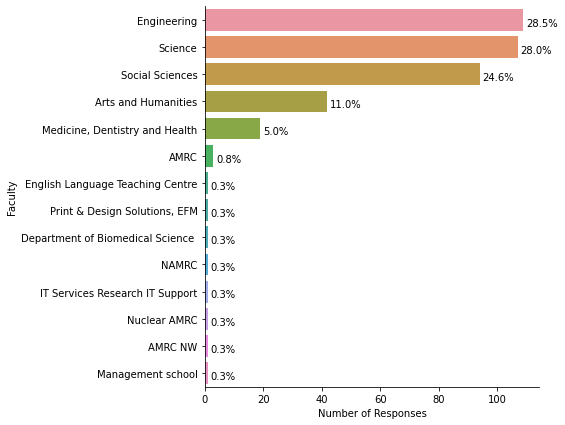

In [5]:
plt.figure(figsize=(6, 7))

ax = sns.countplot(data=sheffield_df, y='faculty', order=sheffield_df['faculty'].value_counts().index)

sns.despine()

annotate_pc(ax, count_responses)

ax.set(xlabel='Number of Responses', ylabel='Faculty')

plt.savefig('charts/01_faculty.png', facecolor='white', bbox_inches='tight', pad_inches=0.5)

# Which of the following organisations usually fund your research?
Each individual respondant could specify multiple funding sources. 

Group 'All others' for cleaner plotting code - summation is handled in plotting.

In [6]:
funder_counts_df['group_funders'] = np.where(funder_counts_df['counts']<=4, 'All others', funder_counts_df['clean_funders'])
funder_counts_df_grp = funder_counts_df.groupby('group_funders')['counts'].sum().to_frame().reset_index()
funder_counts_df_grp['percent'] = funder_counts_df_grp['counts'] / len(funders_df.index)

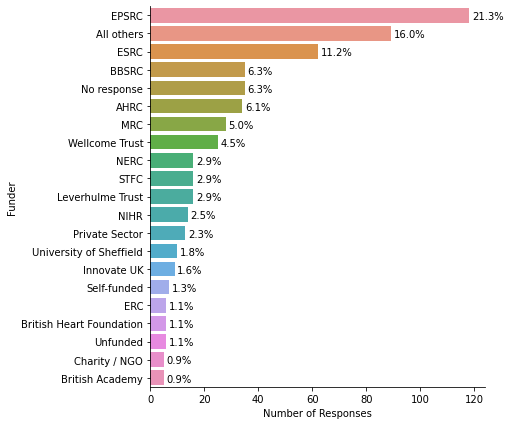

In [7]:
plt.figure(figsize=(6, 7))

ax = sns.barplot(data=funder_counts_df_grp, 
                 y='group_funders', x='counts', 
                 order=funder_counts_df_grp.sort_values('counts', ascending=False).group_funders)

sns.despine()

annotate_pc(ax, len(funders_df.index))

ax.set(xlabel='Number of Responses', ylabel='Funder')

plt.savefig('charts/02_funders.png', facecolor='white', bbox_inches='tight', pad_inches=0.5)

# What is your job title?

Group 'All others' for cleaner plotting code - summation is handled in plotting.

In [8]:
jobs_count_df['group_jobs'] = np.where(jobs_count_df['counts']<=2, 'All others', jobs_count_df['clean_job'])
jobs_count_df_grp = jobs_count_df.groupby('group_jobs')['counts'].sum().to_frame().reset_index()
jobs_count_df_grp['percent'] = jobs_count_df_grp['counts'] / len(sheffield_df.index)

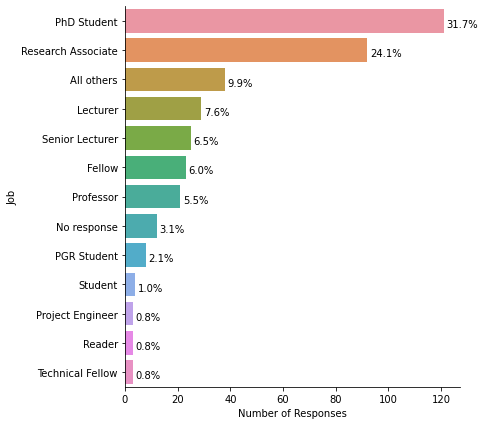

In [9]:
plt.figure(figsize=(6, 7))

ax = sns.barplot(data=jobs_count_df_grp, 
                 y='group_jobs', x='counts', 
                 order=jobs_count_df_grp.sort_values('counts', ascending=False).group_jobs)

sns.despine()

annotate_pc(ax, count_responses)

ax.set(xlabel='Number of Responses', ylabel='Job')

plt.savefig('charts/03_job.png', facecolor='white', bbox_inches='tight', pad_inches=0.5)

# Do you use research software?
"Research software" is any software you have used in the generation of a result that you expect to appear in a publication. This might be anything from a few-line script to clean some data, to a fully fledged software suite. It includes code you have written yourself and code written by someone else.

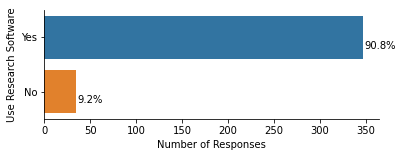

In [10]:
plt.figure(figsize=(6, 2))

ax = sns.countplot(data=sheffield_df, y='use_software', order=sheffield_df['use_software'].value_counts().index)

sns.despine()

annotate_pc(ax, count_responses)

ax.set(xlabel='Number of Responses', ylabel='Use Research Software')

plt.savefig('charts/04_use.png', facecolor='white', bbox_inches='tight', pad_inches=0.5)

# How important is research software to your work?

1: Not at all

5: Vital

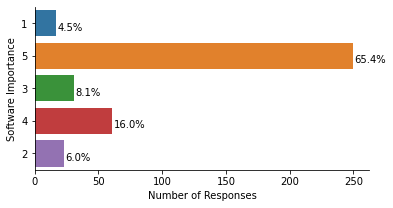

In [11]:
plt.figure(figsize=(6, 3))

ax = sns.countplot(data=sheffield_df, y='importance_software')

sns.despine()

annotate_pc(ax, count_responses)

ax.set(xlabel='Number of Responses', ylabel='Software Importance')

plt.savefig('charts/05_important.png', facecolor='white', bbox_inches='tight', pad_inches=0.5)

# Have you developed your own research software?

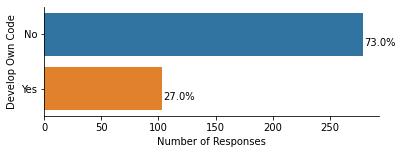

In [12]:
plt.figure(figsize=(6, 2))

ax = sns.countplot(data=sheffield_df, y='develop_own_code', order=sheffield_df['develop_own_code'].value_counts().index)

sns.despine()

annotate_pc(ax, count_responses)

ax.set(xlabel='Number of Responses', ylabel='Develop Own Code')

plt.savefig('charts/06_developed.png', facecolor='white', bbox_inches='tight', pad_inches=0.5)

# How do you rate your software development expertise?

1: Beginner.
5: Professional.

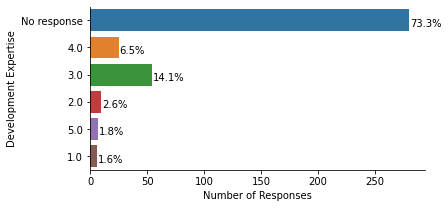

In [13]:
plt.figure(figsize=(6, 3))

ax = sns.countplot(data=sheffield_df, y='development_expertise')

sns.despine()

annotate_pc(ax, count_responses)

ax.set(xlabel='Number of Responses', ylabel='Development Expertise')

plt.savefig('charts/07_rate_dev.png', facecolor='white', bbox_inches='tight', pad_inches=0.5)

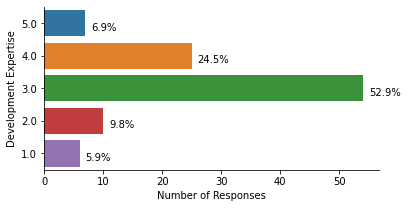

In [14]:
sheffield_df_excl_no_resp = sheffield_df[(sheffield_df.development_expertise != 'No response')]

plt.figure(figsize=(6, 3))

ax = sns.countplot(data=sheffield_df_excl_no_resp, y='development_expertise', order=one_five_order)

sns.despine()

annotate_pc(ax, len(sheffield_df_excl_no_resp.index))

ax.set(xlabel='Number of Responses', ylabel='Development Expertise')

plt.savefig('charts/07_rate_dev_exclude_no_response.png', facecolor='white', bbox_inches='tight', pad_inches=0.5)

# Do you feel that you have received sufficient training to develop reliable software?

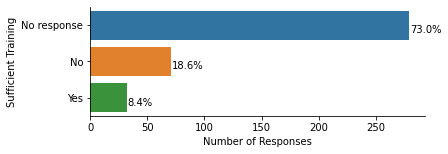

In [15]:
plt.figure(figsize=(6, 2))

ax = sns.countplot(data=sheffield_df, y='training')

sns.despine()

annotate_pc(ax, count_responses)

ax.set(xlabel='Number of Responses', ylabel='Sufficient Training')

plt.savefig('charts/08_training.png', facecolor='white', bbox_inches='tight', pad_inches=0.5)

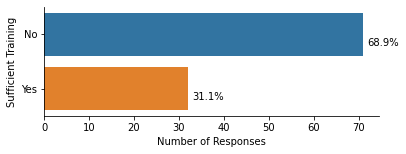

In [16]:
sheffield_df_excl_no_resp = sheffield_df[(sheffield_df.training != 'No response')]

plt.figure(figsize=(6, 2))

ax = sns.countplot(data=sheffield_df_excl_no_resp, y='training')

sns.despine()

annotate_pc(ax, len(sheffield_df_excl_no_resp.index))

ax.set(xlabel='Number of Responses', ylabel='Sufficient Training')

plt.savefig('charts/08_training_exclude_no_response.png', facecolor='white', bbox_inches='tight', pad_inches=0.5)

# Would you be interested in the university helping you commercialise some of your research software?

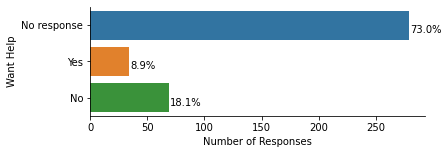

In [17]:
plt.figure(figsize=(6, 2))

ax = sns.countplot(data=sheffield_df, y='want_to_commercialise')

sns.despine()

annotate_pc(ax, count_responses)

ax.set(xlabel='Number of Responses', ylabel='Want Help')

plt.savefig('charts/09_commercialise.png', facecolor='white', bbox_inches='tight', pad_inches=0.5)

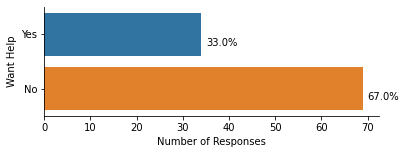

In [18]:
sheffield_df_excl_no_resp = sheffield_df[(sheffield_df.want_to_commercialise != 'No response')]

plt.figure(figsize=(6, 2))

ax = sns.countplot(data=sheffield_df_excl_no_resp, y='want_to_commercialise')

sns.despine()

annotate_pc(ax, len(sheffield_df_excl_no_resp.index))

ax.set(xlabel='Number of Responses', ylabel='Want Help')

plt.savefig('charts/09_commercialise_exclude_no_response.png', facecolor='white', bbox_inches='tight', pad_inches=0.5)

# Do you feel that your research software is ready to be shared with a commercial partner?

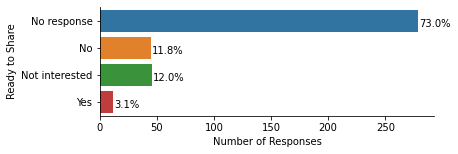

In [19]:
plt.figure(figsize=(6, 2))

ax = sns.countplot(data=sheffield_df, y='ready_to_share')

sns.despine()

annotate_pc(ax, count_responses)

ax.set(xlabel='Number of Responses', ylabel='Ready to Share')

plt.savefig('charts/10_partner.png', facecolor='white', bbox_inches='tight', pad_inches=0.5)

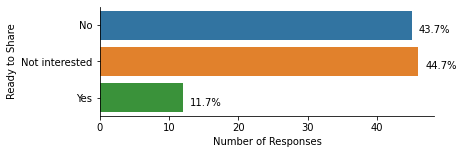

In [20]:
sheffield_df_excl_no_resp = sheffield_df[(sheffield_df.ready_to_share != 'No response')]

plt.figure(figsize=(6, 2))

ax = sns.countplot(data=sheffield_df_excl_no_resp, y='ready_to_share')

sns.despine()

annotate_pc(ax, len(sheffield_df_excl_no_resp.index))

ax.set(xlabel='Number of Responses', ylabel='Ready to Share')

plt.savefig('charts/10_partner_exclude_no_response.png', facecolor='white', bbox_inches='tight', pad_inches=0.5)

# Have you used ShARC/Bessemer, the University's high-performance computing (HPC) system?

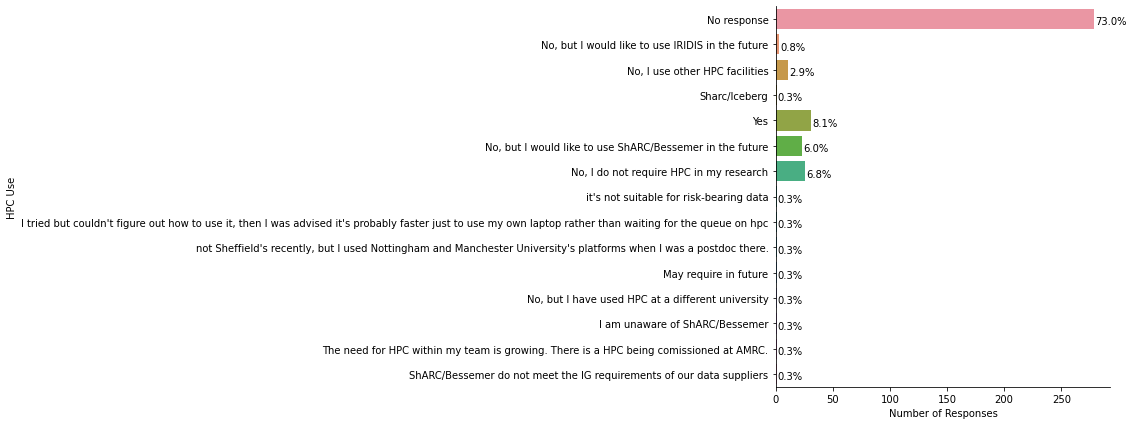

In [21]:
plt.figure(figsize=(6, 7))

ax = sns.countplot(data=sheffield_df, y='hpc_use')

sns.despine()

annotate_pc(ax, count_responses)

ax.set(xlabel='Number of Responses', ylabel='HPC Use')

plt.savefig('charts/11_hpc.png', facecolor='white', bbox_inches='tight', pad_inches=0.5)

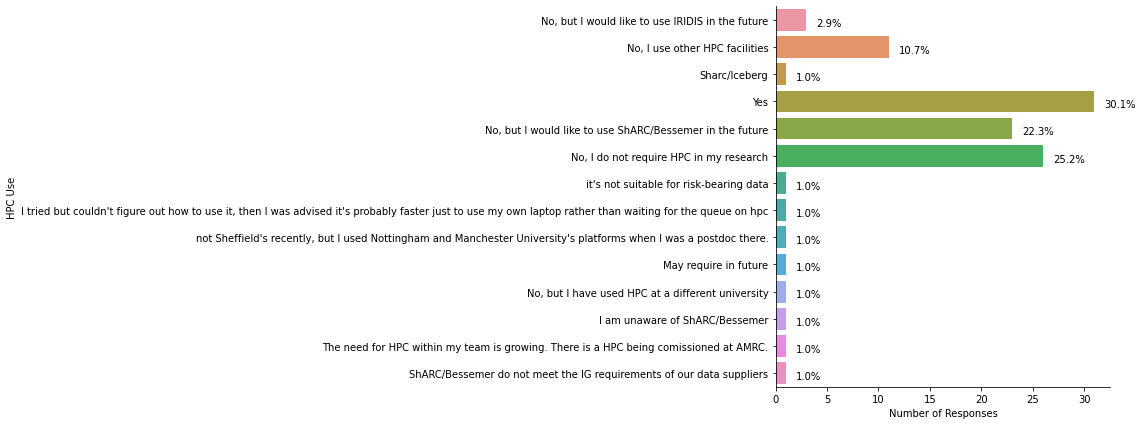

In [22]:
sheffield_df_excl_no_resp = sheffield_df[(sheffield_df.hpc_use != 'No response')]

plt.figure(figsize=(6, 7))

ax = sns.countplot(data=sheffield_df_excl_no_resp, y='hpc_use')

sns.despine()

annotate_pc(ax, len(sheffield_df_excl_no_resp.index))

ax.set(xlabel='Number of Responses', ylabel='HPC Use')

plt.savefig('charts/11_hpc_exclude_no_response.png', facecolor='white', bbox_inches='tight', pad_inches=0.5)

# How confident are you with the following technologies? [Version control]

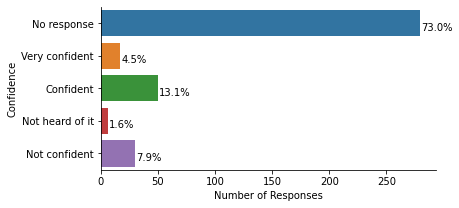

In [23]:
plt.figure(figsize=(6, 3))

ax = sns.countplot(data=sheffield_df, y='version_control')

sns.despine()

annotate_pc(ax, count_responses)

ax.set(xlabel='Number of Responses', ylabel='Confidence')

plt.savefig('charts/12_tech_vc.png', facecolor='white', bbox_inches='tight', pad_inches=0.5)

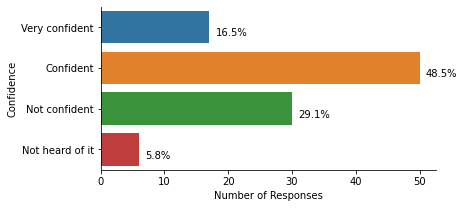

In [24]:
sheffield_df_excl_no_resp = sheffield_df[(sheffield_df.version_control != 'No response')]

plt.figure(figsize=(6, 3))

ax = sns.countplot(data=sheffield_df_excl_no_resp, y='version_control', order=conf_order)

sns.despine()

annotate_pc(ax, len(sheffield_df_excl_no_resp.index))

ax.set(xlabel='Number of Responses', ylabel='Confidence')

plt.savefig('charts/12_tech_vc_exclude_no_response.png', facecolor='white', bbox_inches='tight', pad_inches=0.5)

# How confident are you with the following technologies? [Continuous integration]

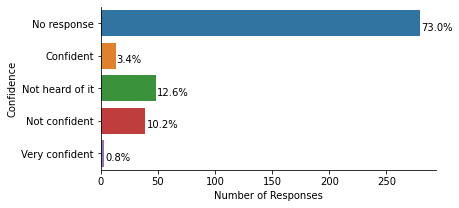

In [25]:
plt.figure(figsize=(6, 3))

ax = sns.countplot(data=sheffield_df, y='continuous_integration')

sns.despine()

annotate_pc(ax, count_responses)

ax.set(xlabel='Number of Responses', ylabel='Confidence')

plt.savefig('charts/13_tech_ci.png', facecolor='white', bbox_inches='tight', pad_inches=0.5)

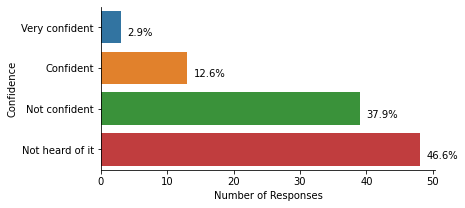

In [26]:
sheffield_df_excl_no_resp = sheffield_df[(sheffield_df.continuous_integration != 'No response')]

plt.figure(figsize=(6, 3))

ax = sns.countplot(data=sheffield_df_excl_no_resp, y='continuous_integration', order=conf_order)

sns.despine()

annotate_pc(ax, len(sheffield_df_excl_no_resp.index))

ax.set(xlabel='Number of Responses', ylabel='Confidence')

plt.savefig('charts/13_tech_ci_exclude_no_response.png', facecolor='white', bbox_inches='tight', pad_inches=0.5)

# How confident are you with the following technologies? [Unit testing]

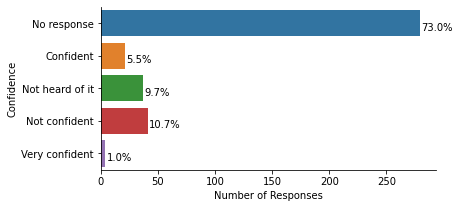

In [27]:
plt.figure(figsize=(6, 3))

ax = sns.countplot(data=sheffield_df, y='unit_testing')

sns.despine()

annotate_pc(ax, count_responses)

ax.set(xlabel='Number of Responses', ylabel='Confidence')

plt.savefig('charts/14_tech_test.png', facecolor='white', bbox_inches='tight', pad_inches=0.5)

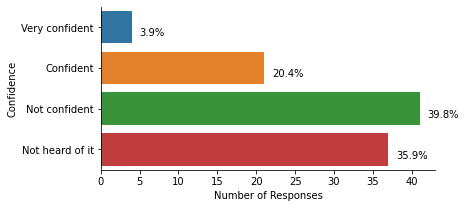

In [28]:
sheffield_df_excl_no_resp = sheffield_df[(sheffield_df.unit_testing != 'No response')]

plt.figure(figsize=(6, 3))

ax = sns.countplot(data=sheffield_df_excl_no_resp, y='unit_testing', order=conf_order)

sns.despine()

annotate_pc(ax, len(sheffield_df_excl_no_resp.index))

ax.set(xlabel='Number of Responses', ylabel='Confidence')

plt.savefig('charts/14_tech_test_exclude_no_response.png', facecolor='white', bbox_inches='tight', pad_inches=0.5)

# How would you rate the university's current level of support for your software-development needs?

1 poor, 5 excellent

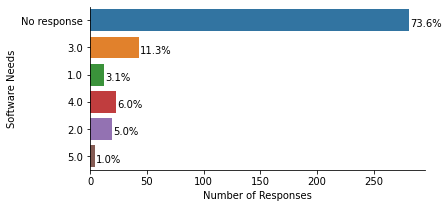

In [29]:
plt.figure(figsize=(6, 3))

ax = sns.countplot(data=sheffield_df, y='current_support')

sns.despine()

annotate_pc(ax, count_responses)

ax.set(xlabel='Number of Responses', ylabel='Software Needs')

plt.savefig('charts/15_support.png', facecolor='white', bbox_inches='tight', pad_inches=0.5)

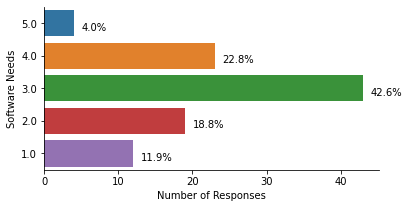

In [30]:
sheffield_df_excl_no_resp = sheffield_df[(sheffield_df.current_support != 'No response')]

plt.figure(figsize=(6, 3))

ax = sns.countplot(data=sheffield_df_excl_no_resp, y='current_support', order=one_five_order)

sns.despine()

annotate_pc(ax, len(sheffield_df_excl_no_resp.index))

ax.set(xlabel='Number of Responses', ylabel='Software Needs')

plt.savefig('charts/15_support_exclude_no_response.png', facecolor='white', bbox_inches='tight', pad_inches=0.5)

# Have you or someone in your group ever hired someone specifically to develop software?

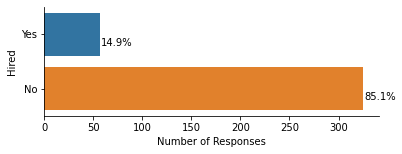

In [31]:
plt.figure(figsize=(6, 2))

ax = sns.countplot(data=sheffield_df, y='hired_developer')

sns.despine()

annotate_pc(ax, count_responses)

ax.set(xlabel='Number of Responses', ylabel='Hired')

plt.savefig('charts/16_hired.png', facecolor='white', bbox_inches='tight', pad_inches=0.5)

# Have you ever included costs for software development in a funding proposal?

Check all that apply

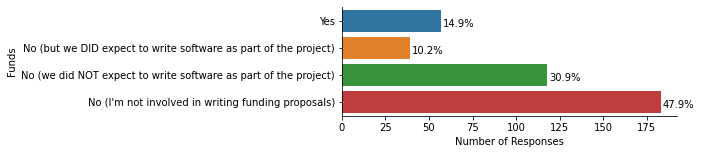

In [32]:
plt.figure(figsize=(6, 2))

ax = sns.countplot(data=funds_for_development_df, y='funds_for_development')

sns.despine()

annotate_pc(ax, count_responses)

ax.set(xlabel='Number of Responses', ylabel='Funds')

plt.savefig('charts/17_funding.png', facecolor='white', bbox_inches='tight', pad_inches=0.5)

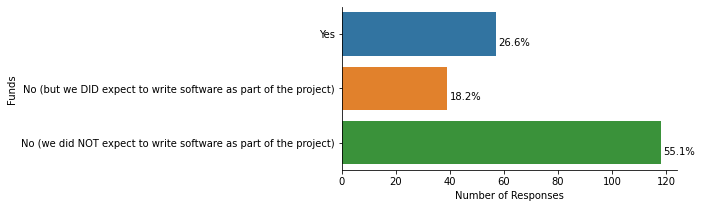

In [33]:
funds_for_development_df_excl_not_funding = funds_for_development_df[(funds_for_development_df.funds_for_development != "No (I'm not involved in writing funding proposals)")]

plt.figure(figsize=(6, 3))

ax = sns.countplot(data=funds_for_development_df_excl_not_funding, y='funds_for_development')

sns.despine()

annotate_pc(ax, len(funds_for_development_df_excl_not_funding.index))

ax.set(xlabel='Number of Responses', ylabel='Funds')

plt.savefig('charts/17a_funding_excl_not_funding.png', facecolor='white', bbox_inches='tight', pad_inches=0.5)

Percent expecting to write software, but not asking for money to do so.

In [34]:
0.18/(0.27+0.18)*100

40.0

# How suitable would the following models be for your software development needs? [Hire a full-time software developer]

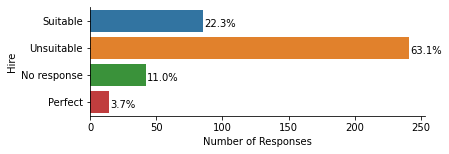

In [35]:
plt.figure(figsize=(6, 2))

ax = sns.countplot(data=sheffield_df, y='hire_full_time_developer')

sns.despine()

annotate_pc(ax, count_responses)

ax.set(xlabel='Number of Responses', ylabel='Hire')

plt.savefig('charts/18_model_ft.png', facecolor='white', bbox_inches='tight', pad_inches=0.5)

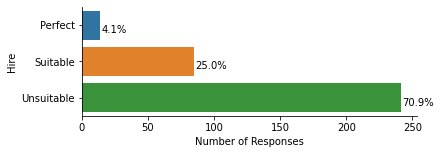

In [36]:
sheffield_df_excl_no_resp = sheffield_df[(sheffield_df.hire_full_time_developer != 'No response')]

plt.figure(figsize=(6, 2))

ax = sns.countplot(data=sheffield_df_excl_no_resp, y='hire_full_time_developer', order=order_suitability)

sns.despine()

annotate_pc(ax, len(sheffield_df_excl_no_resp.index))

ax.set(xlabel='Number of Responses', ylabel='Hire')

plt.savefig('charts/18_model_ft_exclude_no_response.png', facecolor='white', bbox_inches='tight', pad_inches=0.5)

# How suitable would the following models be for your software development needs? [Recruit a developer (or fractional FTE equivalent of a developer) from a central University of Sheffield pool as needed]

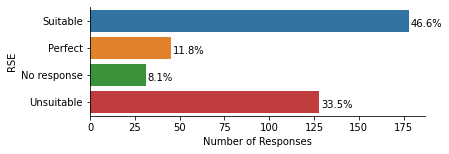

In [37]:
plt.figure(figsize=(6, 2))

ax = sns.countplot(data=sheffield_df, y='hire_rse')

sns.despine()

annotate_pc(ax, count_responses)

ax.set(xlabel='Number of Responses', ylabel='RSE')

plt.savefig('charts/19_model_rse.png', facecolor='white', bbox_inches='tight', pad_inches=0.5)

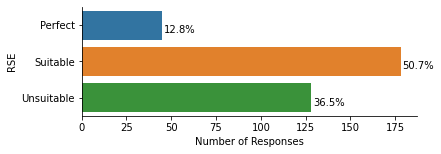

In [38]:
sheffield_df_excl_no_resp = sheffield_df[(sheffield_df.hire_rse != 'No response')]

plt.figure(figsize=(6, 2))

ax = sns.countplot(data=sheffield_df_excl_no_resp, y='hire_rse', order=order_suitability)

sns.despine()

annotate_pc(ax, len(sheffield_df_excl_no_resp.index))

ax.set(xlabel='Number of Responses', ylabel='RSE')

plt.savefig('charts/19_model_rse_exclude_no_response.png', facecolor='white', bbox_inches='tight', pad_inches=0.5)